In [2]:
# Import des librairies
# Base
%matplotlib inline
import numpy as np # type: ignore
import pandas as pd # type: ignore
import time,os
import cv2# type: ignore

# Data Viz
import matplotlib.pyplot as plt# type: ignore
import seaborn as sns# type: ignore

# Modèle
import tensorflow as tf# type: ignore
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,MaxPool2D# type: ignore
from keras import layers, models, optimizers, losses, metrics,callbacks,utils,Model,Sequential,Input# type: ignore

# Rééchantillonnage 
from sklearn.model_selection import train_test_split# type: ignore

# Evaluation et métriques
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay# type: ignore

# Transformation
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
print("tensorflow version",tf.__version__)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

#Sauvegarde variables
import pickle


tensorflow version 2.16.1
Num GPUs Available:  0


Fonctions

In [3]:
def my_preprocessing_func(img):
    image = np.array(img)
    return image / 255

Selection des données

In [6]:
print('getcwd:      ', os.getcwd())
#selection only_healthy
if 0==1:
    directory1=(r"D:\Adrien et Sarah\Documents\GitHub\models\DATASETS\Maladie_sur_les_plantes\New_Plant_Diseases_Dataset_only_healthy\train")
    directory2=(r"D:\Adrien et Sarah\Documents\GitHub\models\DATASETS\Maladie_sur_les_plantes\New_Plant_Diseases_Dataset_only_healthy\valid")
    directory3=(r"D:\Adrien et Sarah\Documents\GitHub\models\DATASETS\Maladie_sur_les_plantes\New_Plant_Diseases_Dataset_only_healthy\test")
#selection all
if 0==1:
    directory1=(r"D:\Adrien et Sarah\Documents\GitHub\models\DATASETS\Maladie_sur_les_plantes\01_New_Plant_Diseases_Dataset\train")
    directory2=(r"D:\Adrien et Sarah\Documents\GitHub\models\DATASETS\Maladie_sur_les_plantes\01_New_Plant_Diseases_Dataset\valid")
    directory3=(r"D:\Adrien et Sarah\Documents\GitHub\models\DATASETS\Maladie_sur_les_plantes\01_New_Plant_Diseases_Dataset\test")   
#03_Plant_Diseases_Dataset_off_outliers
if 1==1:
    directory1=(r"D:\Adrien et Sarah\Documents\GitHub\models\DATASETS\Maladie_sur_les_plantes\03_Plant_Diseases_Dataset_off_outliers\train")
    directory2=(r"D:\Adrien et Sarah\Documents\GitHub\models\DATASETS\Maladie_sur_les_plantes\03_Plant_Diseases_Dataset_off_outliers\valid")
    directory3=(r"D:\Adrien et Sarah\Documents\GitHub\models\DATASETS\Maladie_sur_les_plantes\03_Plant_Diseases_Dataset_off_outliers\test")   
print('le filename de img_color est :', directory1)

getcwd:       d:\Adrien et Sarah\Documents\GitHub\JAN24_PLANT_RECOGNITION\notebooks
le filename de img_color est : D:\Adrien et Sarah\Documents\GitHub\models\DATASETS\Maladie_sur_les_plantes\03_Plant_Diseases_Dataset_off_outliers\train


Téléchargez le jeu de données

In [7]:
#augmentation de donnée : rotation_range=10, width_shift_range=0.1,  height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True,
train_gen = ImageDataGenerator(preprocessing_function=my_preprocessing_func)
val_gen = ImageDataGenerator(preprocessing_function=my_preprocessing_func)   
test_datagen = ImageDataGenerator(preprocessing_function=my_preprocessing_func)

train_generator=train_gen.flow_from_directory(
    directory=directory1,
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=32,
    shuffle=False,
    class_mode="categorical"
)

valid_generator = val_gen.flow_from_directory(
    directory=directory2,
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory=directory3,
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 68841 images belonging to 38 classes.
Found 17491 images belonging to 38 classes.
Found 0 images belonging to 0 classes.


Creer un model CNN

In [5]:
cnn = Sequential()
cnn.add(Input(shape=(256,256,3),dtype=tf.float32))
cnn.add(layers.Conv2D(32,(3, 3),padding='same',activation='relu',input_shape=(256,256,3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(256, (3, 3), activation='relu'))
cnn.add(layers.Dropout(0.25))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(units=512,activation='relu'))#1500
cnn.add(layers.Dropout(0.4)) #To avoid overfitting
#Output Layer
cnn.add(layers.Dense(units=len(train_generator.class_indices),activation='softmax'))
cnn.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

d:\Adrien et Sarah\Documents\GitHub\JAN24_PLANT_RECOGNITION\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   102,760,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         6,156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,155,532 (393.51 MB)

 Trainable params: 103,155,532 (393.51 MB)

 Non-trainable params: 0 (0.00 B)

Ajustement/Entraînement du modèle

In [7]:
early_stopping = callbacks.EarlyStopping(monitor = 'val_loss',
                                        patience = 5,
                                        mode = 'min',
                                        restore_best_weights = True)

lr_plateau = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience=5,
                                        factor=0.5,
                                        verbose=2,
                                        mode='min',
                                        min_lr = 1e-10) # type: ignore

In [ ]:

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
#Model.fit_generator est obsolète depuis TensorFlow 2.1.0
#vous pouvez le corriger en utilisant Model.fit pour utiliser ImageDataGenerator comme entrée

# entrainement avec la méthode .fit()
history = cnn.fit(train_generator, 
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=2,#9
                    callbacks=[early_stopping,lr_plateau]
)
#cnn.save(r"..\..\models\cnn1.keras")
# Saving the objects:
#with open('objs.pkl', 'w') as f:  # Python 3: open(..., 'wb')
#    pickle.dump([history], f)

Évaluer le modèle

In [8]:
# Saving the objects:

with open(r'..\references\objs.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(history, f)

NameError: name 'history' is not defined

In [1]:
import mlflow

logged_model = r'\\wsl.localhost\Ubuntu\home\adrien\MLflow\mlruns\902956440979823799\965c82771e144a14a8ed9875930dd581\artifacts\model'

# Load model as a PyFuncModel.
cnn = mlflow.pyfunc.load_model(logged_model)

2024/09/07 13:55:00 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.16.0, required: mlflow==2.14.3)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/09/07 13:55:00 WARNING mlflow.pyfunc: The version of Python that the model was saved in, `Python 3.12.2`, differs from the version of Python that is currently running, `Python 3.11.9`, and may be incompatible
d:\Adrien et Sarah\Documents\GitHub\JAN24_PLANT_RECOGNITION\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 40 variables whereas the saved optimizer has 78 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [16]:
cnn=models.load_model(logged_model+"/data/model.keras")

d:\Adrien et Sarah\Documents\GitHub\JAN24_PLANT_RECOGNITION\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 40 variables whereas the saved optimizer has 78 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [9]:
#restoration model
print('getcwd:      ', os.getcwd())
cnn=models.load_model(r"..\..\models\tomates.keras")
# Getting back the objects:
with open(r'..\references\objs.pkl','rb') as f:  # Python 3: open(..., 'rb')
    history = pickle.load(f)
    

getcwd:       d:\Adrien et Sarah\Documents\GitHub\JAN24_PLANT_RECOGNITION\notebooks


EOFError: Ran out of input

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model_loss_by_epoch")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='right')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='right')
plt.show()

Prédire la sortie

In [20]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=cnn.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

ValueError: Must provide at least one structure

In [18]:
valid_generator.reset()
true_classes = valid_generator.classes
pred=cnn.predict(valid_generator)

predicted_class_indices_v=np.argmax(pred,axis=1)

labels_v = (train_generator.class_indices)
labels_v = dict((v,k) for k,v in labels_v.items())
predictions_v = [labels[k] for k in predicted_class_indices_v]

d:\Adrien et Sarah\Documents\GitHub\JAN24_PLANT_RECOGNITION\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


547/547 ━━━━━━━━━━━━━━━━━━━━ 2365s 4s/step


NameError: name 'labels' is not defined

In [23]:
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
predicted_class_indices_v=np.argmax(pred,axis=1)

labels_v = (train_generator.class_indices)
labels_v = dict((v,k) for k,v in labels_v.items())
predictions_v = [labels[k] for k in predicted_class_indices_v]

enregistrez les résultats dans un fichier CSV.En option

In [24]:
labels.items()

dict_items([(0, 'Apple___Apple_scab'), (1, 'Apple___Black_rot'), (2, 'Apple___Cedar_apple_rust'), (3, 'Apple___healthy'), (4, 'Blueberry___healthy'), (5, 'Cherry_(including_sour)___Powdery_mildew'), (6, 'Cherry_(including_sour)___healthy'), (7, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'), (8, 'Corn_(maize)___Common_rust_'), (9, 'Corn_(maize)___Northern_Leaf_Blight'), (10, 'Corn_(maize)___healthy'), (11, 'Grape___Black_rot'), (12, 'Grape___Esca_(Black_Measles)'), (13, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'), (14, 'Grape___healthy'), (15, 'Orange___Haunglongbing_(Citrus_greening)'), (16, 'Peach___Bacterial_spot'), (17, 'Peach___healthy'), (18, 'Pepper,_bell___Bacterial_spot'), (19, 'Pepper,_bell___healthy'), (20, 'Potato___Early_blight'), (21, 'Potato___Late_blight'), (22, 'Potato___healthy'), (23, 'Raspberry___healthy'), (24, 'Soybean___healthy'), (25, 'Squash___Powdery_mildew'), (26, 'Strawberry___Leaf_scorch'), (27, 'Strawberry___healthy'), (28, 'Tomato___Bacterial_spo

In [25]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames})
results["Predictions"]=predictions
#results.to_csv("results.csv",index=False)

In [34]:
#results.to_csv("results.csv",index=False)
#Get True Values of classes,label
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
#Get matrix
report = classification_report(true_classes, predicted_class_indices, target_names=class_labels)
print(report)    
ConfusionMatrixDisplay.from_predictions(true_classes, predicted_class_indices);
print("On constate avec la matrice de confusion que le modèle retenu parvient à prédire environ ")

ValueError: Found input variables with inconsistent numbers of samples: [0, 17491]

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.93      0.94       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.90      0.94       436
                                   Apple___healthy       0.93      0.98      0.96       502
                               Blueberry___healthy       0.94      0.99      0.96       449
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       416
                 Cherry_(including_sour)___healthy       0.99      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.90      0.92       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.95      0.

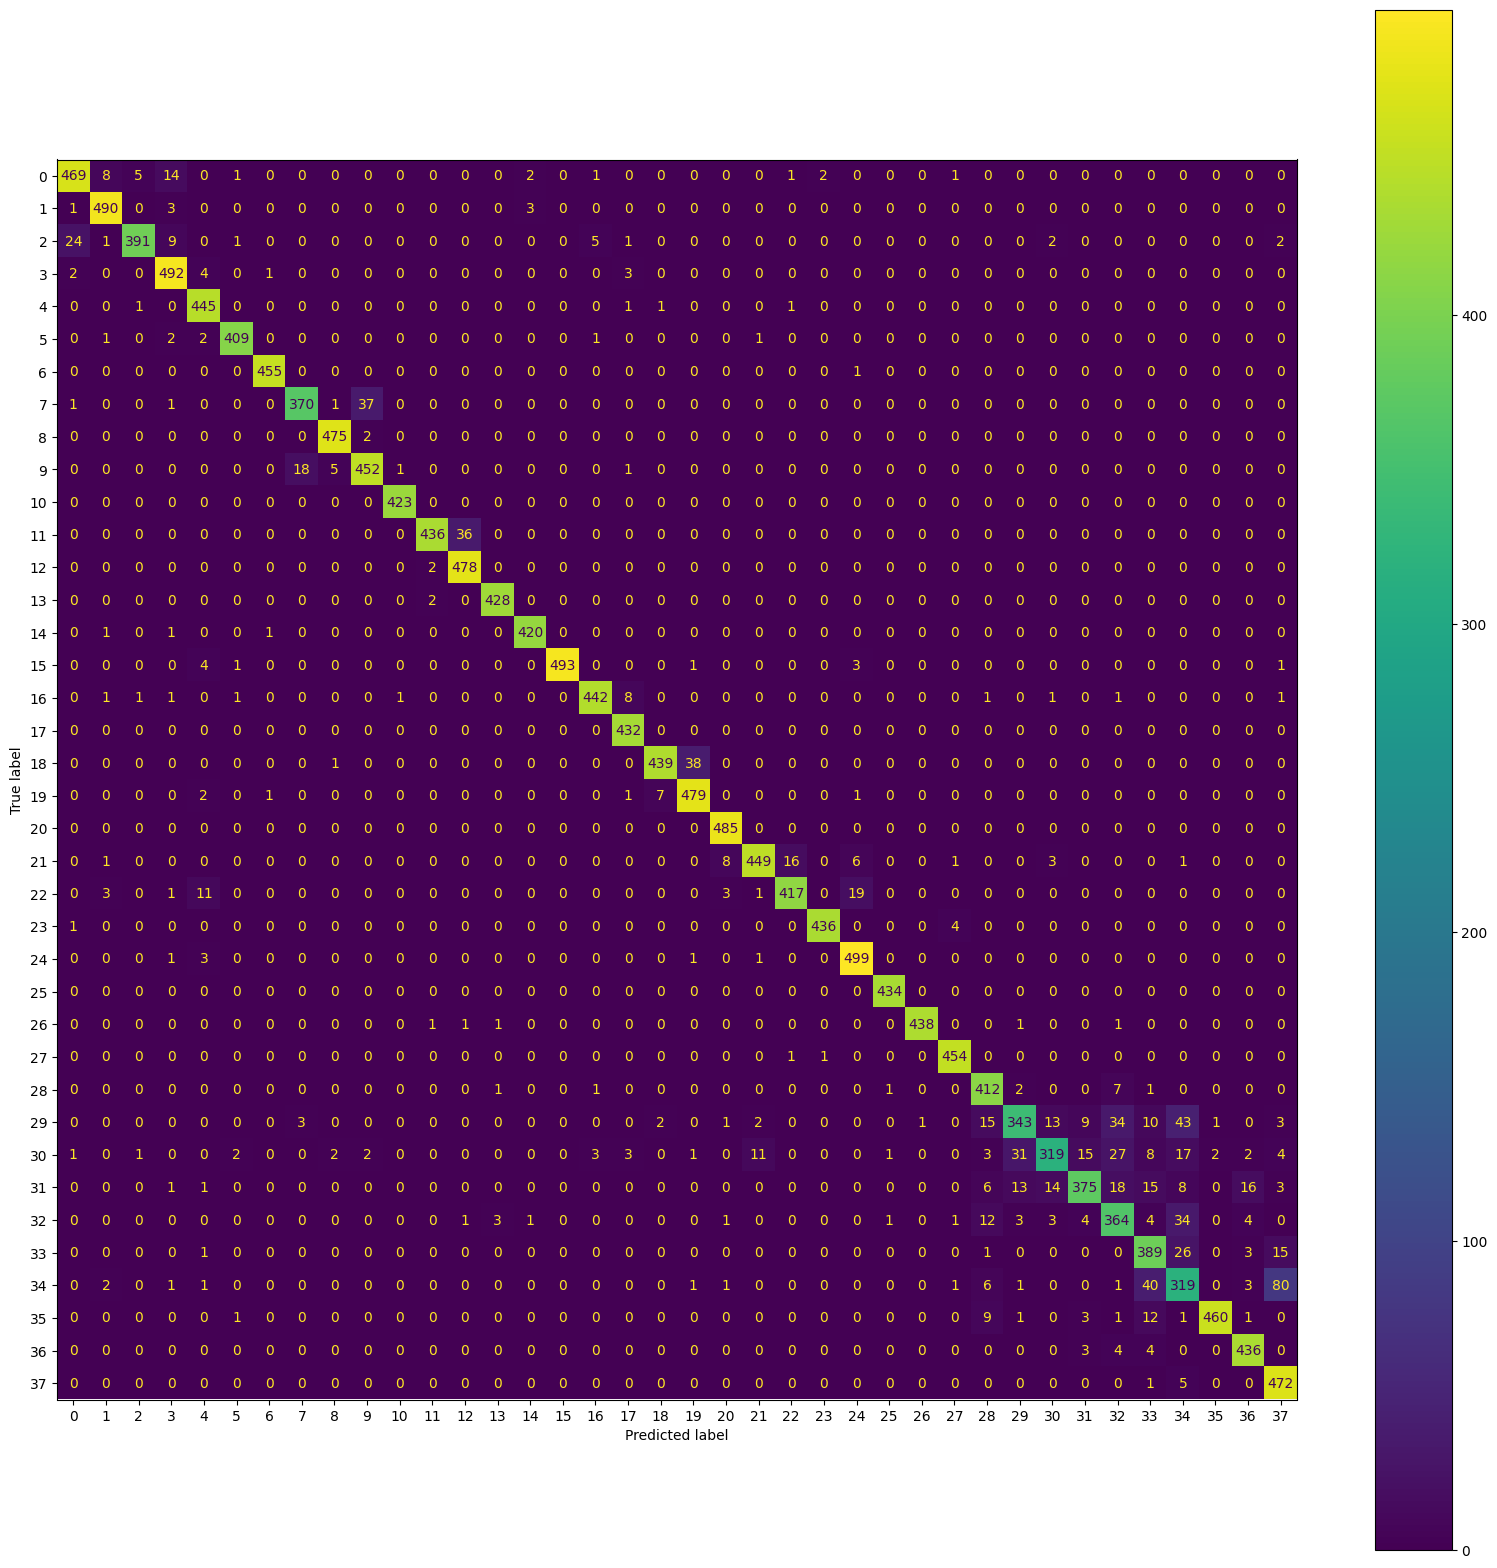

In [33]:
#Get True Values of classes,label
from matplotlib import figure


true_classes = valid_generator.classes
class_labels = list(valid_generator.class_indices.keys())
#Get matrix
report = classification_report(true_classes, predicted_class_indices_v, target_names=class_labels)
print(report)    
fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_predictions(true_classes, predicted_class_indices_v,ax=ax);